# Interpolation Exercise 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')

In [2]:
from scipy.interpolate import griddata

## Sparse 2d interpolation

In this example the values of a scalar field $f(x,y)$ are known at a very limited set of points in a square domain:

* The square domain covers the region $x\in[-5,5]$ and $y\in[-5,5]$.
* The values of $f(x,y)$ are zero on the boundary of the square at integer spaced points.
* The value of $f$ is known at a single interior point: $f(0,0)=1.0$.
* The function $f$ is not known at any other points.

Create arrays `x`, `y`, `f`:

* `x` should be a 1d array of the x coordinates on the boundary and the 1 interior point.
* `y` should be a 1d array of the y coordinates on the boundary and the 1 interior point.
* `f` should be a 1d array of the values of f at the corresponding x and y coordinates.

You might find that `np.hstack` is helpful.

In [10]:
# Collaborated with James A. on this part

x=np.empty(1,)
x[0]=0
x=np.hstack((x,[-5]*11))
for i in range(-4,5):
    x=np.hstack((x,np.array((i,i))))
x=np.hstack((x,np.array(([5]*11))))

y=np.empty(1,)
for i in range(-5,6):
    y=np.hstack((y,np.array((i))))
y=np.hstack((y,np.array((5,-5)*9)))
for i in range(-5,6):
    y=np.hstack((y,np.array((i))))
    
f=np.zeros_like(x)
f[0]=1.0

The following plot should show the points on the boundary and the single point in the interior:

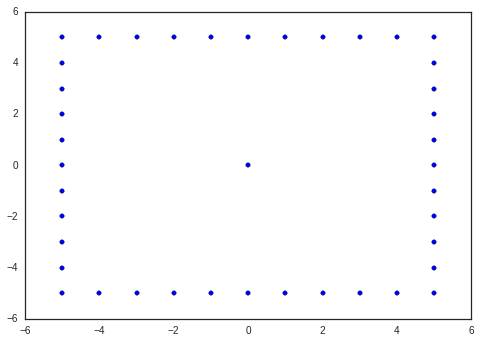

In [11]:
plt.scatter(x, y);

In [12]:
assert x.shape==(41,)
assert y.shape==(41,)
assert f.shape==(41,)
assert np.count_nonzero(f)==1

Use `meshgrid` and `griddata` to interpolate the function $f(x,y)$ on the entire square domain:

* `xnew` and `ynew` should be 1d arrays with 100 points between $[-5,5]$.
* `Xnew` and `Ynew` should be 2d versions of `xnew` and `ynew` created by `meshgrid`.
* `Fnew` should be a 2d array with the interpolated values of $f(x,y)$ at the points (`Xnew`,`Ynew`).
* Use cubic spline interpolation.

In [13]:
xnew=np.linspace(-5,5,100)
ynew=np.linspace(-5,5,100)
Xnew,Ynew=np.meshgrid(xnew,ynew)
Fnew=griddata((x,y),f,(Xnew,Ynew),method='cubic')

In [14]:
assert xnew.shape==(100,)
assert ynew.shape==(100,)
assert Xnew.shape==(100,100)
assert Ynew.shape==(100,100)
assert Fnew.shape==(100,100)

Plot the values of the interpolated scalar field using a contour plot. Customize your plot to make it effective and beautiful.

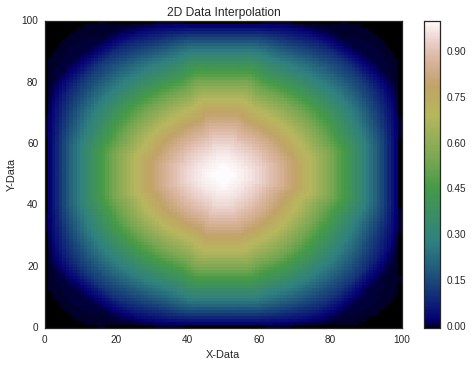

In [18]:
plt.pcolormesh(Fnew,cmap='gist_earth')
plt.colorbar()
plt.title('2D Data Interpolation')
plt.xlabel('X-Data')
plt.ylabel('Y-Data');

In [ ]:
assert True # leave this to grade the plot